### Lines Formed in Accretion Disk WDins
#### Line Luminosities, Emission Measures and Dependence on System Paramters



When we plot the equivalent width (EW) against volume emission measure (EM) for our models, we find a relation that looks an awful lot like a standard curve of growth.

For reference, EW here is defined as

$$EW = \int_{-\infty}^{\infty} \frac{F_{\lambda} - F_{c}}{F_{c}} d\lambda,$$

and EM is defined as

$$EM = \int_{wind} N_e^2 dV.$$

Here $dV$ is a volume element, and the integral is over the entire outflow.

The basic theory of curves-of-grown is discussed very nicely here: https://www.astro.uvic.ca/~tatum/stellatm/atm11.pdf

Usually, it's applied to absorption lines, but it really applies to emission lines also, since they, too can saturate. Specifically, the formal solution of the radiative transfer equation can be written as 

$$I_\lambda = I_{\lambda,0} \, e^{-\tau} \,\, + S_\lambda \, (1 - e^{-\tau}),$$

where I've assumed a constant source function $S$ in a slab that's illuminated by a background source $I_{\lambda,0}$. The optical depth through the slab is $\tau$. If the slab were in LTE, $S = B$, i.e. the blackbody function. In the optically thick limit, this saturates at $I_{\lambda} = S_{\lambda}$.



For lines with Gaussian profiles, the CoG can be written as

$$W = K_1 \,\, \int_0^{\infty} \left[ 1 - exp\left( -\tau_0 \,\, e^{-\Delta^2} \right) \right] d\Delta,$$

where we'll treat $K_1$ is a normalization constant (I'm not 100% sure this is OK).

In principle, we obviously can't treat our wind-formed lines as Gaussians, but that's what we're going to do for now.

Let's do this integral.

[0.08557287 0.10676905 0.13291521 0.16500082 0.20412168 0.25143874
 0.30810205 0.37512886 0.45322856 0.54257804 0.64257226 0.75160828
 0.86699829 0.98512749 1.10193798 1.21369659 1.31781056 1.41331331
 1.50073461 1.58143862 1.65687667 1.72817418 1.79609479 1.86115879
 1.92374502 1.9841457  2.04259467 2.09928378 2.15437341 2.2079996
 2.26027923 2.31131367 2.36119171 2.40999167 2.45778309 2.50462815
 2.55058266 2.59569706 2.64001703 2.68358419]


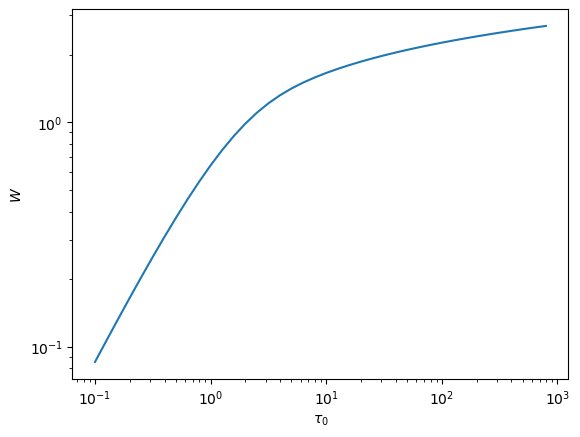

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

all_ltau_0 = np.arange(-1,3,0.1)
all_tau_0 = 10.0**all_ltau_0

def integrand(delta, tau_0):
    f = 1 - np.exp(-tau_0 * np.exp(-delta*delta))
    return f

W = all_tau_0 * 0 
i = 0
for tau_0 in all_tau_0:
    W[i] = quad(integrand, 0, np.inf, args=(tau_0))[0]
    i = i + 1

print(W)
plt.loglog(all_tau_0, W)
plt.xlabel(r'$\tau_0$')
plt.ylabel(r'$W$')
plt.show()

So now let's assume that EM is a tracer of $\tau$. Let's write this formally as 

$$\tau_0 = K_2 \,\times \, EM.$$



Then if we plot EW vs EM, we have two parameters we can adjust: $K_1$ (the vertical shift), $K_2$ (the horizontal shift).

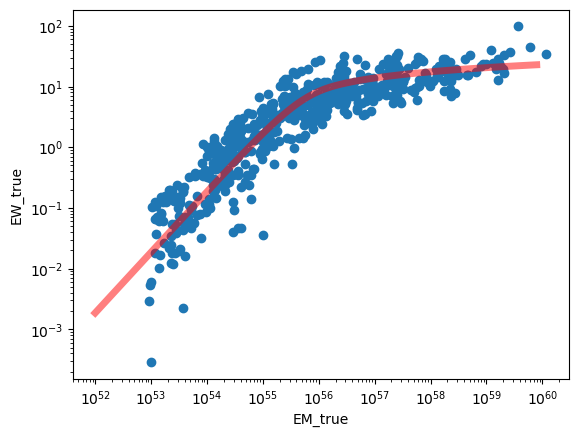

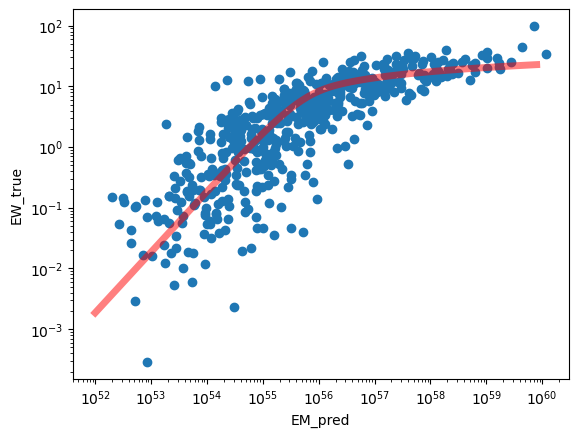

In [21]:
EW_true, EM_true, EM_pred, L_Line= np.loadtxt('for_christian.csv', unpack=True, skiprows=1, delimiter=',')

K1 = 7.0
K2 = 3.0e-56
all_lEM = np.arange(52,60,0.1)
all_EM = 10.0**all_lEM
all_tau_0 = K2 * all_EM

W = all_EM * 0 
i = 0
for tau_0 in all_tau_0:
    W[i] = K1 * quad(integrand, 0, np.inf, args=(tau_0))[0]
    i = i + 1

#print(W)
plt.yscale('log')
plt.xscale('log')
plt.plot(all_EM, W,zorder=100, alpha=0.5, lw=5, c='red')
plt.scatter(EM_true, EW_true)
plt.xlabel('EM_true')
plt.ylabel('EW_true')
plt.show()

plt.yscale('log')
plt.xscale('log')
plt.plot(all_EM, W,zorder=100, alpha=0.5, lw=5, c='red')
plt.scatter(EM_pred, EW_true)
plt.xlabel('EM_pred')
plt.ylabel('EW_true')
plt.show()
